In [1]:
from all_imports import *

import _modules

%store -r COZIE_MAIN_DF

df = COZIE_MAIN_DF.copy()
df['index_time'] = pd.to_datetime(df['index_time'])
df.set_index('index_time', inplace=True)

 ### test init### 


In [2]:
display(df.head(5))

,id_participant,id_onesignal,api_phone_survey_url,api_read_key,api_read_url,api_watch_survey_url,api_write_key,api_write_url,app_bundle_build_number,app_bundle_build_version,...,Scoria_speed_accuracy,Scoria_course,Scoria_course_accuracy,Skintemp_Value,ts_wrist_temperature,ts_wrist_temperature_lambda,ts_wrist_temperature_trigger,ws_wrist_temperature,ws_wrist_temperature_lambda,ws_wrist_temperature_trigger
index_time,,,,,,,,,,,,,,,,,,,,,
2024-01-18 07:21:45.906000+08:00,esse00,940ec978-94ae-4e9d-a2b4-845e29892fab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-18 08:54:08.994000+08:00,esse00,940ec978-94ae-4e9d-a2b4-845e29892fab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-18 08:55:47.902000+08:00,esse00,940ec978-94ae-4e9d-a2b4-845e29892fab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-18 08:55:48.170000+08:00,esse00,940ec978-94ae-4e9d-a2b4-845e29892fab,https://forms.gle/BGGJ8es2fz4uvmFc7,5LkKVBO1Zp2pbYBbnkQsb8njmf8sGB5zhMrYQmPd,https://at6x6b7v54hmoki6dlyew72csq0ihxrn.lambd...,https://raw.githubusercontent.com/buds-lab/cal...,5LkKVBO1Zp2pbYBbnkQsb8njmf8sGB5zhMrYQmPd,https://43cb5nnwe3mejojyftbuaow4640nsrnd.lambd...,3.0.1,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-18 08:55:53.641000+08:00,esse00,940ec978-94ae-4e9d-a2b4-845e29892fab,https://forms.gle/BGGJ8es2fz4uvmFc7,5LkKVBO1Zp2pbYBbnkQsb8njmf8sGB5zhMrYQmPd,https://at6x6b7v54hmoki6dlyew72csq0ihxrn.lambd...,https://raw.githubusercontent.com/buds-lab/cal...,5LkKVBO1Zp2pbYBbnkQsb8njmf8sGB5zhMrYQmPd,https://43cb5nnwe3mejojyftbuaow4640nsrnd.lambd...,3.0.1,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Question Responses

['id_participant', 'q_clothing_color', 'q_clothing_insulation', 'q_clothing_material', 'q_comfort_behavioral', 'q_comfort_heatintensity', 'q_comfort_heatstress', 'q_comfort_heatsymptoms', 'q_comfort_humidity', 'q_comfort_ind-activity', 'q_comfort_out-activity', 'q_comfort_preference', 'q_comfort_sensation', 'q_comfort_sun', 'q_comfort_sun_a', 'q_comfort_sun_b', 'q_comfort_wind', 'q_environment_shade', 'q_general_location_area', 'q_general_location_change', 'q_general_location_envi', 'q_indoor_condition']


,Agree,Disagree,Neutral
id_participant,,,
esse02,64.0,49.0,6.0
esse07,10.0,31.0,59.0
esse08,49.0,66.0,21.0
esse09,28.0,36.0,40.0
esse10,39.0,0.0,67.0
esse11,52.0,34.0,14.0
esse13,8.0,97.0,41.0
esse14,54.0,35.0,13.0


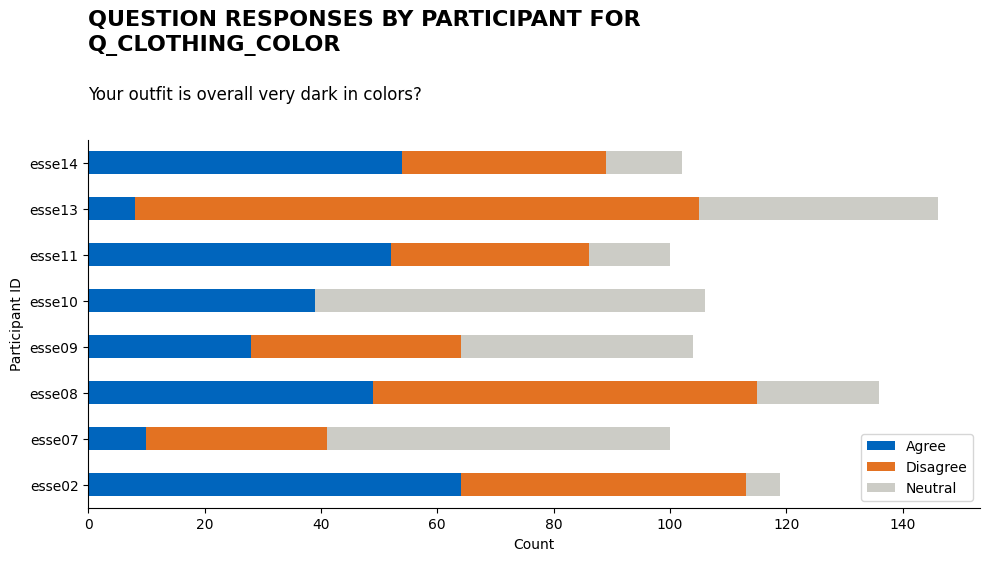

In [3]:
import textwrap

select_columns = ['id_participant'] + df.filter(regex='^q_').columns.tolist()
print(select_columns)

df_filtered = df[df['id_participant'] != 'esse00']
df_filtered = df_filtered[select_columns]
grouped_df = df_filtered.groupby('id_participant')

# Print column names for each group
#for name, group in grouped_df:
#    print(f"Columns for group '{name}':")
#    print(group.columns.tolist())
#    print()

df_filtered = df_filtered.dropna(subset=['q_general_location_envi'])

# Count up each response for each participant for each "q_" column
response_counts = df_filtered.groupby('id_participant').apply(lambda group: group.select_dtypes(include=['object']).apply(pd.Series.value_counts))

#print(response_counts)

# Select response counts for the specified column
#Those must match!
expected_responses = ['Agree', 'Disagree', 'Neutral']
colors = [_modules.TUMBlue, _modules.TUMAccentOrange, _modules.TUMLightGray] 


question_full = 'Your outfit is overall very dark in colors?'
question_id = 'q_clothing_color'

specified_column_counts = response_counts[question_id]
specified_column_counts = specified_column_counts.dropna()
specified_column_counts_df = specified_column_counts.unstack(fill_value=0)


existing_responses = specified_column_counts_df.columns
missing_responses = set(expected_responses) - set(existing_responses)

# Add missing responses and set count to 0
for missing_response in missing_responses:
    specified_column_counts_df[missing_response] = 0

specified_column_counts_df = specified_column_counts_df.reindex(columns=expected_responses, fill_value=0)
display(specified_column_counts_df)



title = f'Question responses by participant for {question_id}'
subtitle = f'{question_full}'
# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the stacked bar chart
specified_column_counts_df.plot(kind='barh', stacked=True, ax=ax, color=colors)

# Set labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Participant ID')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Split the title string into substrings of length 30 characters
wrapped_title = textwrap.fill(title.upper(), width=45)

# Convert the wrapped title into a list of lines
lines = wrapped_title.split('\n')

# Starting y-coordinate for the text
y_coordinate = 1.3

# Plot each line of the wrapped title
for line in lines:
    plt.text(0, y_coordinate, line, fontsize=16, fontweight='bold', transform=ax.transAxes, ha='left', va='bottom')
    y_coordinate -= 0.07  # Adjust this value to control the spacing between lines

plt.text(0, 1.1, subtitle, fontsize=12, transform=ax.transAxes, ha='left', va='bottom')

# Show plot
plt.tight_layout()
plt.show()


In [4]:
def extract_numeric_part(participant_id):
    return int(''.join(filter(str.isdigit, participant_id)))

def plot_stacked_bar_chart(response_counts, expected_responses, colors, question_full, question_id, max_value=None):
    specified_column_counts = response_counts[question_id].dropna()
    specified_column_counts_df = specified_column_counts.unstack(fill_value=0)

    existing_responses = specified_column_counts_df.columns
    missing_responses = set(expected_responses) - set(existing_responses)

    for missing_response in missing_responses:
        specified_column_counts_df[missing_response] = 0

    specified_column_counts_df = specified_column_counts_df.reindex(columns=expected_responses, fill_value=0)
    
    # Sort participant IDs
    sorted_participant_ids = sorted(specified_column_counts_df.index, key=extract_numeric_part)
    specified_column_counts_df = specified_column_counts_df.reindex(sorted_participant_ids)

    title = f'Question responses by participant for {question_id}'
    subtitle = f'{question_full}'
    
    fig, ax = plt.subplots(figsize=(10, 6))
    specified_column_counts_df.plot(kind='barh', stacked=True, ax=ax, color=colors)
    ax.set_xlabel('Count')
    ax.set_ylabel('Participant ID')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if max_value:
        ax.set_xlim(0, max_value)

    wrapped_title = textwrap.fill(title.upper(), width=45)
    lines = wrapped_title.split('\n')
    y_coordinate = 1.3

    for line in lines:
        plt.text(0, y_coordinate, line, fontsize=16, fontweight='bold', transform=ax.transAxes, ha='left', va='bottom')
        y_coordinate -= 0.07

    plt.text(0, 1.1, subtitle, fontsize=12, transform=ax.transAxes, ha='left', va='bottom')
    plt.tight_layout()
    plt.show()

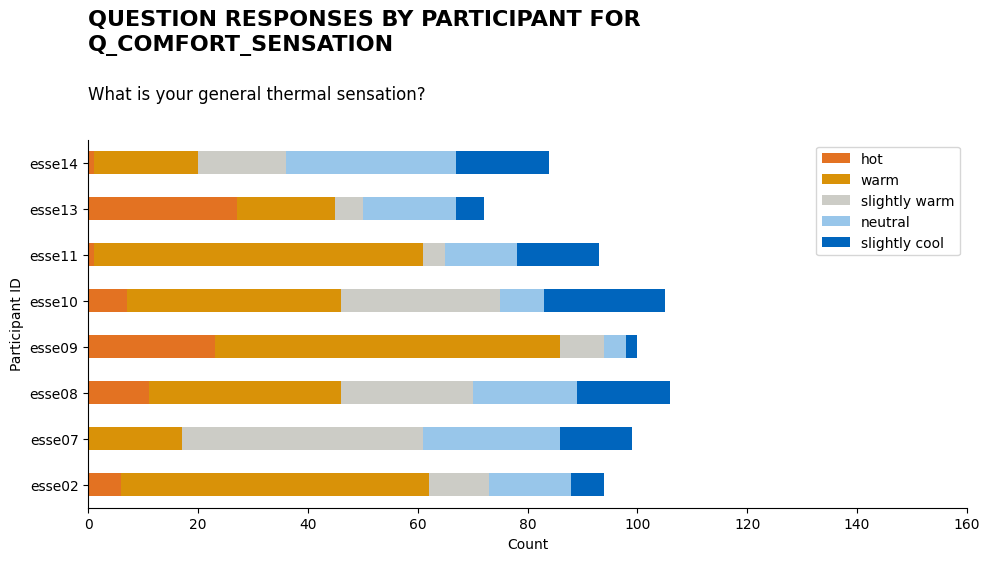

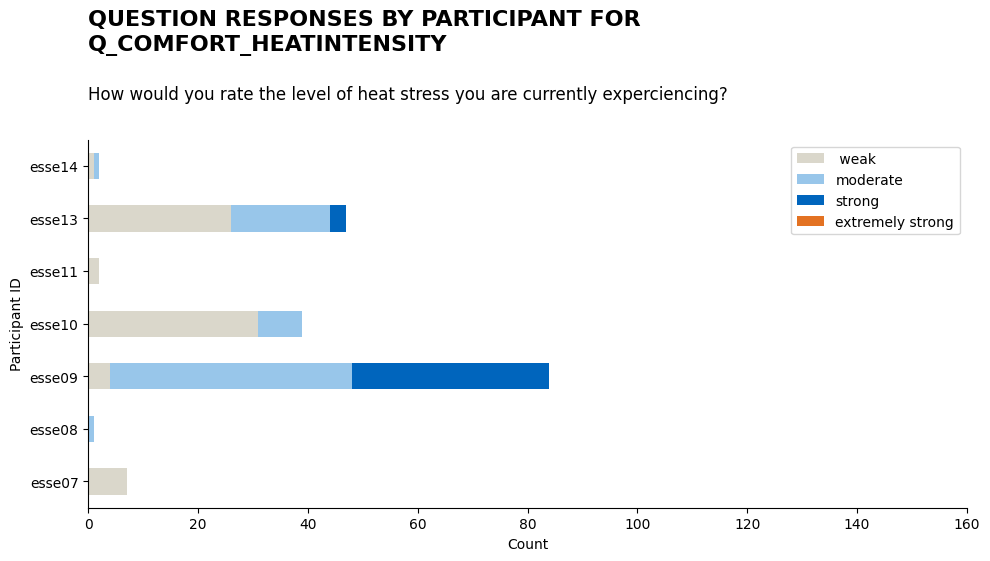

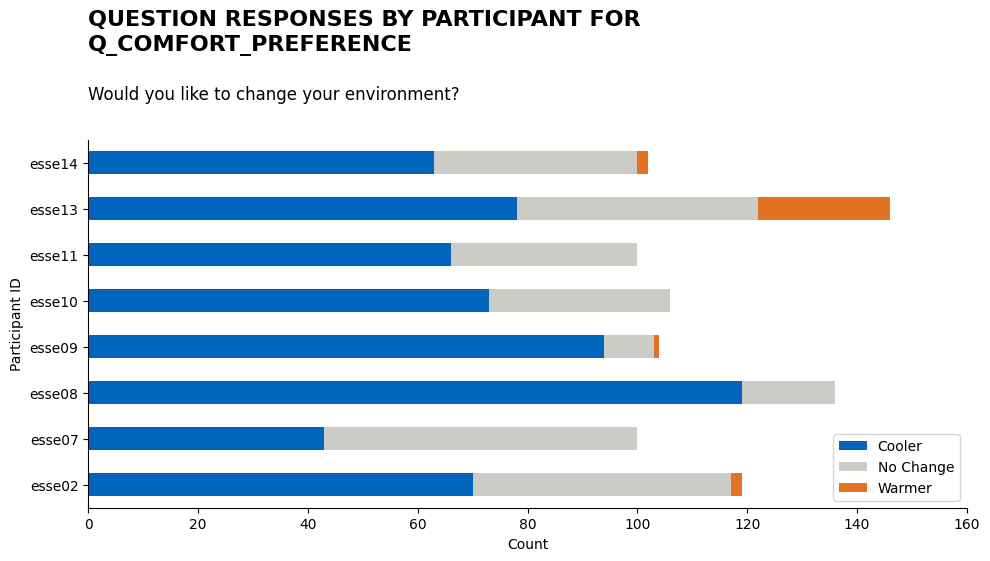

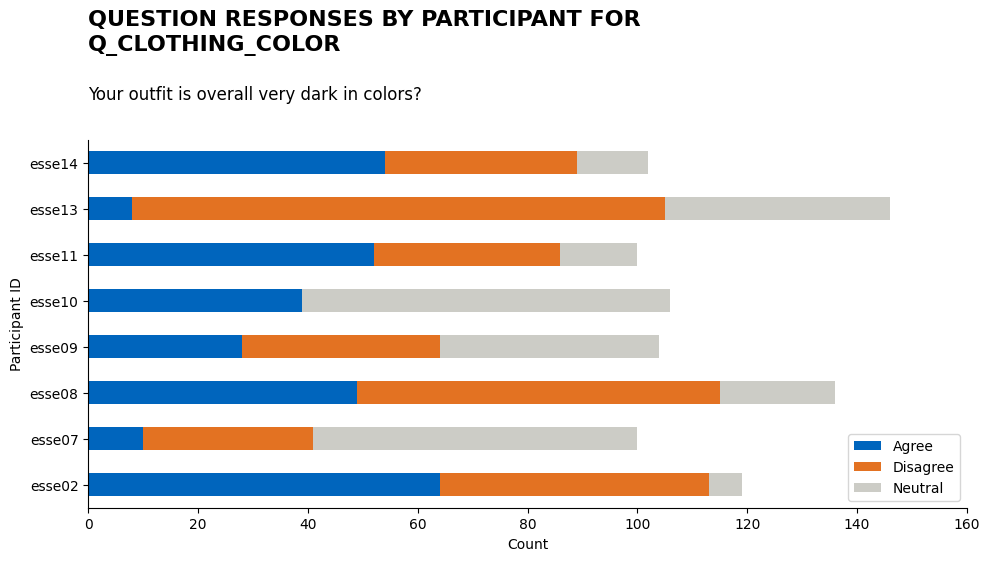

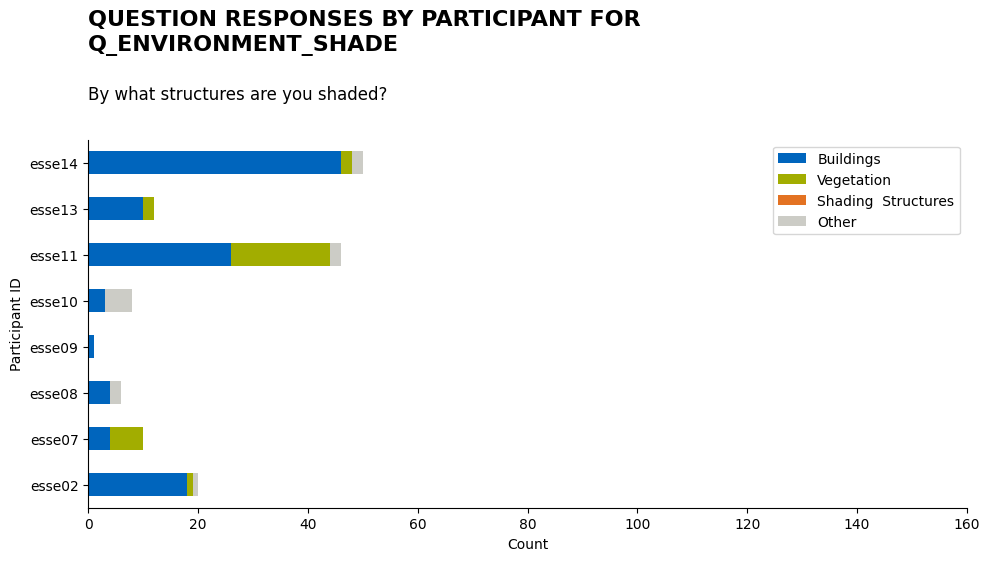

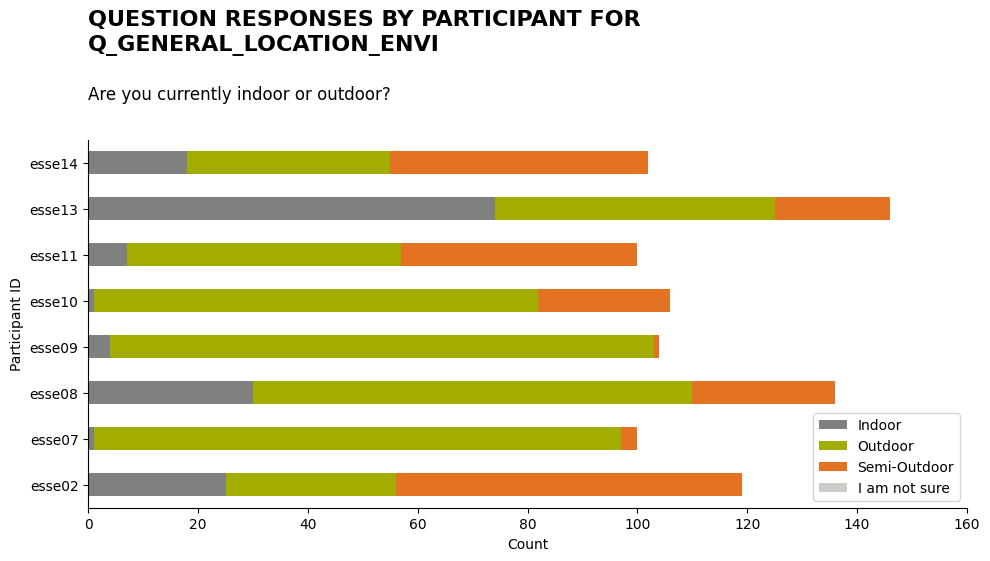

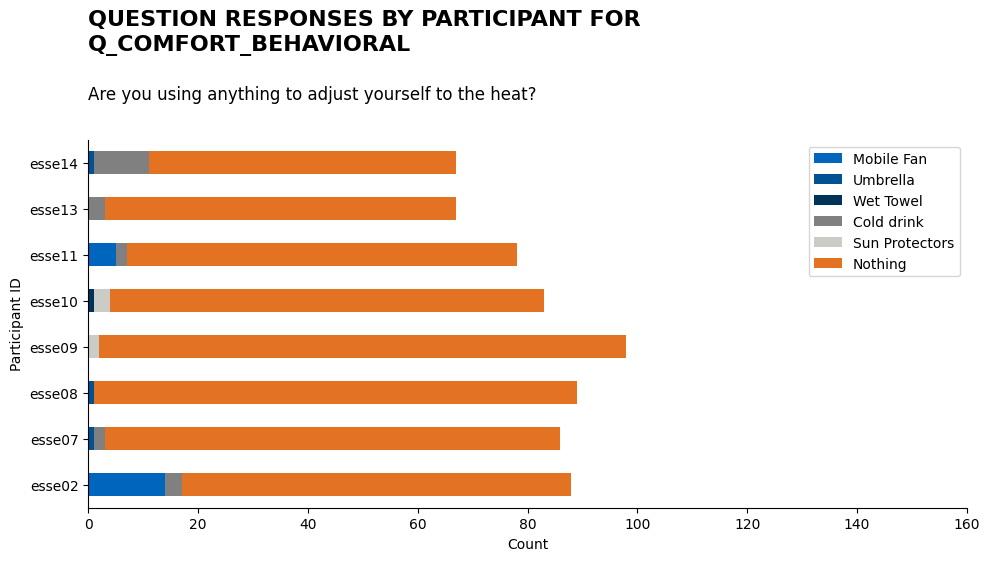

In [8]:
# -----------------------------------
max_value = 160
expected_responses = ['hot', 'warm', 'slightly warm', 'neutral', 'slightly cool']
colors = [_modules.TUMAccentOrange, _modules.TUMOrangeDark, _modules.TUMLightGray, _modules.TUMAccentLightBlue, _modules.TUMBlue] 
question_full = 'What is your general thermal sensation?'
question_id = 'q_comfort_sensation'

plot_stacked_bar_chart(response_counts, expected_responses, colors, question_full, question_id, max_value)

# -----------------------------------
max_value = 160
expected_responses = [' weak', 'moderate', 'strong', 'extremely strong']
colors = [_modules.TUMAccentGray, _modules.TUMAccentLightBlue, _modules.TUMBlue, _modules.TUMAccentOrange] 
question_full = 'How would you rate the level of heat stress you are currently experciencing?'
question_id = 'q_comfort_heatintensity'

plot_stacked_bar_chart(response_counts, expected_responses, colors, question_full, question_id, max_value)

# -----------------------------------
max_value = 160
expected_responses = ['Cooler', 'No Change', 'Warmer']
colors = [ _modules.TUMBlue, _modules.TUMLightGray, _modules.TUMAccentOrange] 
question_full = 'Would you like to change your environment?'
question_id = 'q_comfort_preference'

plot_stacked_bar_chart(response_counts, expected_responses, colors, question_full, question_id, max_value)


# -----------------------------------
max_value = 160
expected_responses = ['Buildings', 'Vegetation', 'Shading  Structures', 'Other']
colors = [_modules.TUMBlue, _modules.TUMAccentGreen, _modules.TUMAccentOrange, _modules.TUMLightGray] 
question_full = 'By what structures are you shaded?'
question_id = 'q_environment_shade'

plot_stacked_bar_chart(response_counts, expected_responses, colors, question_full, question_id, max_value)

# -----------------------------------
max_value = 160
expected_responses = ['Indoor', 'Outdoor', 'Semi-Outdoor', 'I am not sure']
colors = [_modules.TUMGray, _modules.TUMAccentGreen, _modules.TUMAccentOrange, _modules.TUMLightGray] 
question_full = 'Are you currently indoor or outdoor?'
question_id = 'q_general_location_envi'

plot_stacked_bar_chart(response_counts, expected_responses, colors, question_full, question_id, max_value)

# -----------------------------------
max_value = 160
expected_responses = ['Mobile Fan', 'Umbrella', 'Wet Towel', 'Cold drink', 'Sun Protectors', 'Nothing']
colors = [_modules.TUMBlue, _modules.TUMSecondaryBlue, _modules.TUMSecondaryBlue2, _modules.TUMGray, _modules.TUMLightGray, _modules.TUMAccentOrange] 
question_full = 'Are you using anything to adjust yourself to the heat?'
question_id = 'q_comfort_behavioral'

plot_stacked_bar_chart(response_counts, expected_responses, colors, question_full, question_id, max_value)

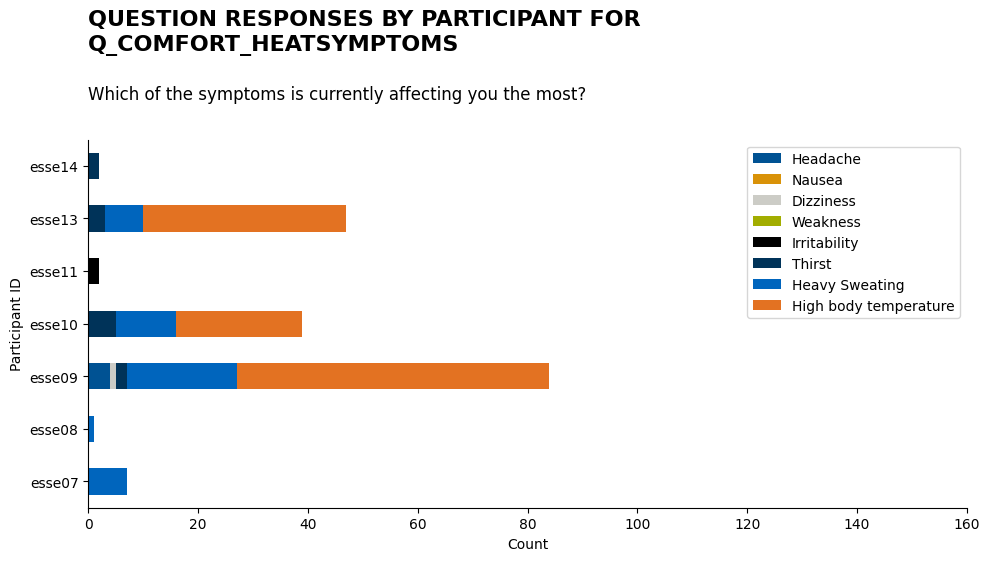

In [11]:
# -----------------------------------
max_value = 160
expected_responses = ['Headache', 'Nausea', 'Dizziness', 'Weakness', 'Irritability', 'Thirst', 'Heavy Sweating', 'High body temperature']
colors = [_modules.TUMSecondaryBlue, _modules.TUMOrangeDark , _modules.TUMLightGray , _modules.TUMAccentGreen ,_modules.TUMBlack ,_modules.TUMSecondaryBlue2 ,_modules.TUMBlue ,_modules.TUMAccentOrange] 
question_full = 'Which of the symptoms is currently affecting you the most?'
question_id = 'q_comfort_heatsymptoms'

plot_stacked_bar_chart(response_counts, expected_responses, colors, question_full, question_id, max_value)


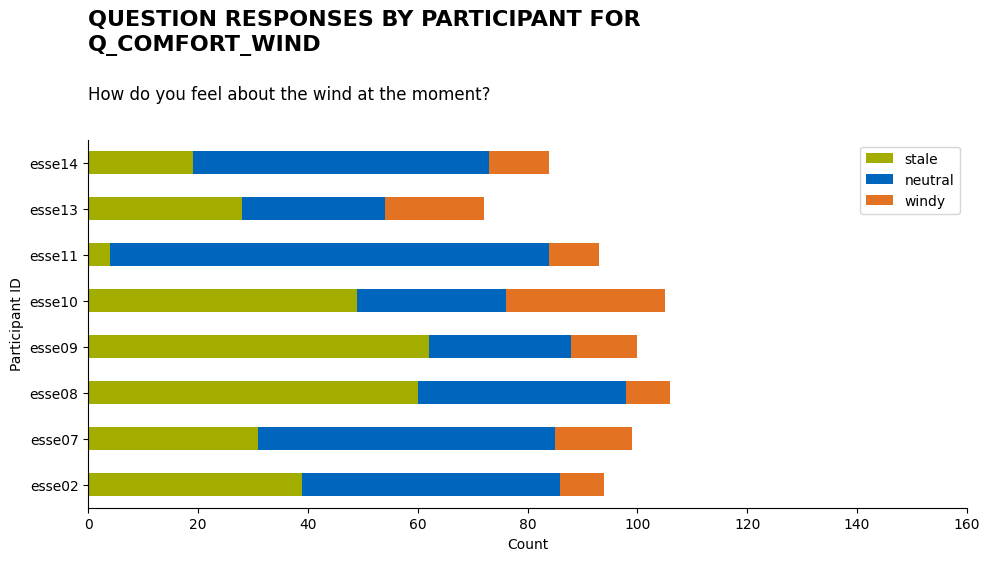

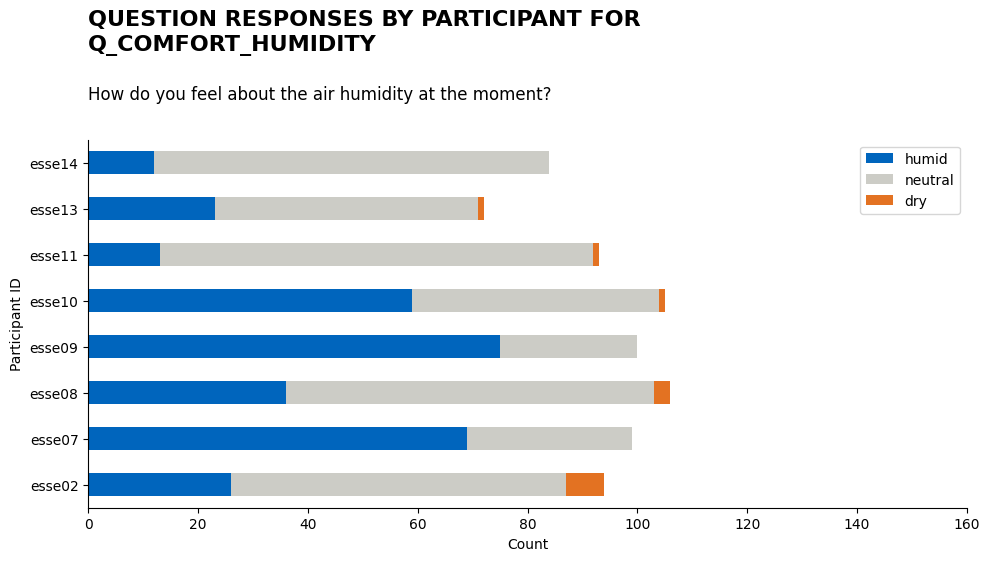

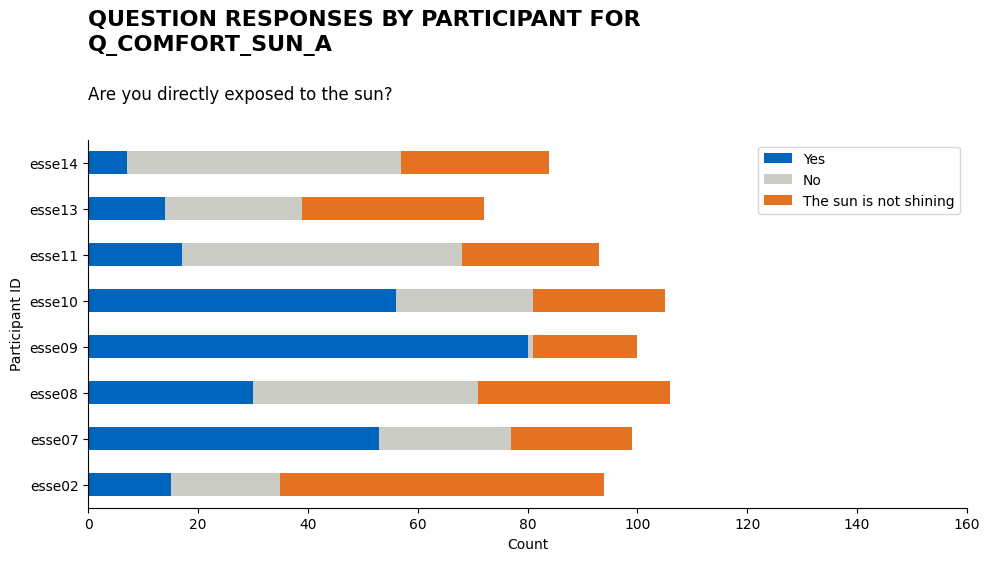

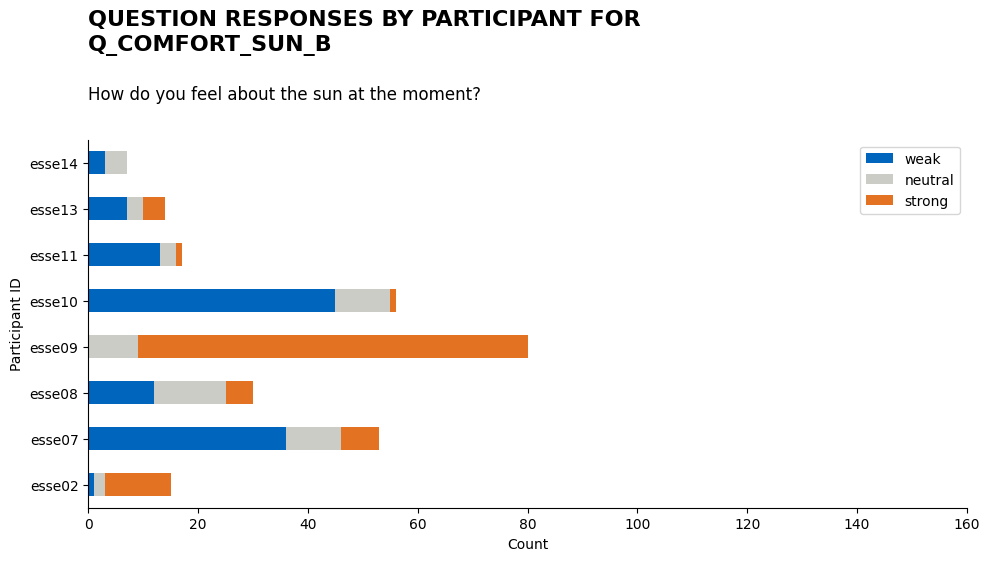

In [14]:
# -----------------------------------
max_value = 160
expected_responses = ['stale', 'neutral', 'windy']
colors = [_modules.TUMAccentGreen, _modules.TUMBlue, _modules.TUMAccentOrange] 
question_full = 'How do you feel about the wind at the moment?'
question_id = 'q_comfort_wind'

plot_stacked_bar_chart(response_counts, expected_responses, colors, question_full, question_id, max_value)

# -----------------------------------
max_value = 160
expected_responses = ['humid', 'neutral', 'dry']
colors = [_modules.TUMBlue, _modules.TUMLightGray, _modules.TUMAccentOrange] 
question_full = 'How do you feel about the air humidity at the moment?'
question_id = 'q_comfort_humidity'

plot_stacked_bar_chart(response_counts, expected_responses, colors, question_full, question_id, max_value)

# -----------------------------------
max_value = 160
expected_responses = ['Yes', 'No', 'The sun is not shining']
colors = [_modules.TUMBlue, _modules.TUMLightGray, _modules.TUMAccentOrange] 
question_full = 'Are you directly exposed to the sun?'
question_id = 'q_comfort_sun_a'

plot_stacked_bar_chart(response_counts, expected_responses, colors, question_full, question_id, max_value)


# -----------------------------------
max_value = 160
expected_responses = ['weak', 'neutral', 'strong']
colors = [_modules.TUMBlue, _modules.TUMLightGray, _modules.TUMAccentOrange] 
question_full = 'How do you feel about the sun at the moment?'
question_id = 'q_comfort_sun_b'

plot_stacked_bar_chart(response_counts, expected_responses, colors, question_full, question_id, max_value)


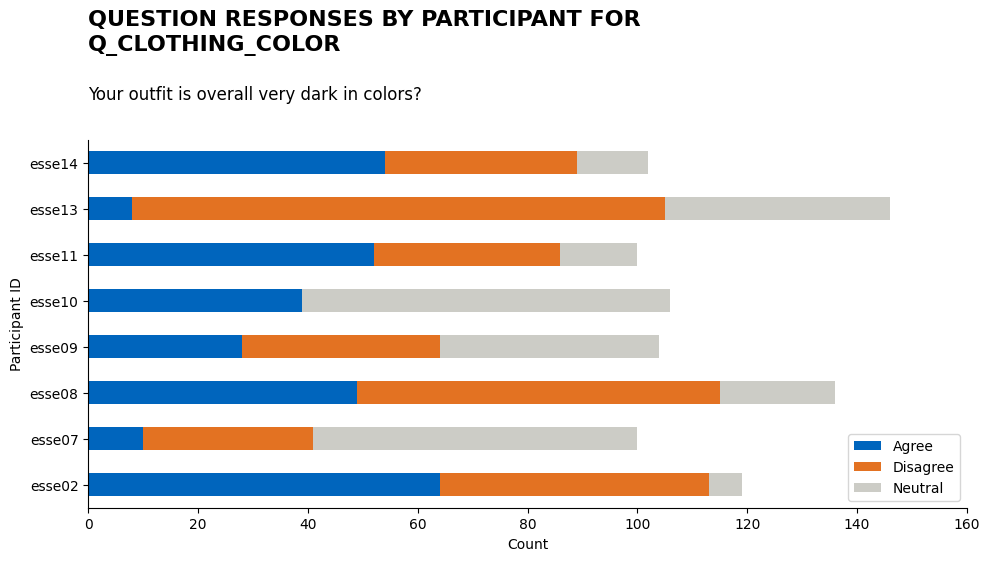

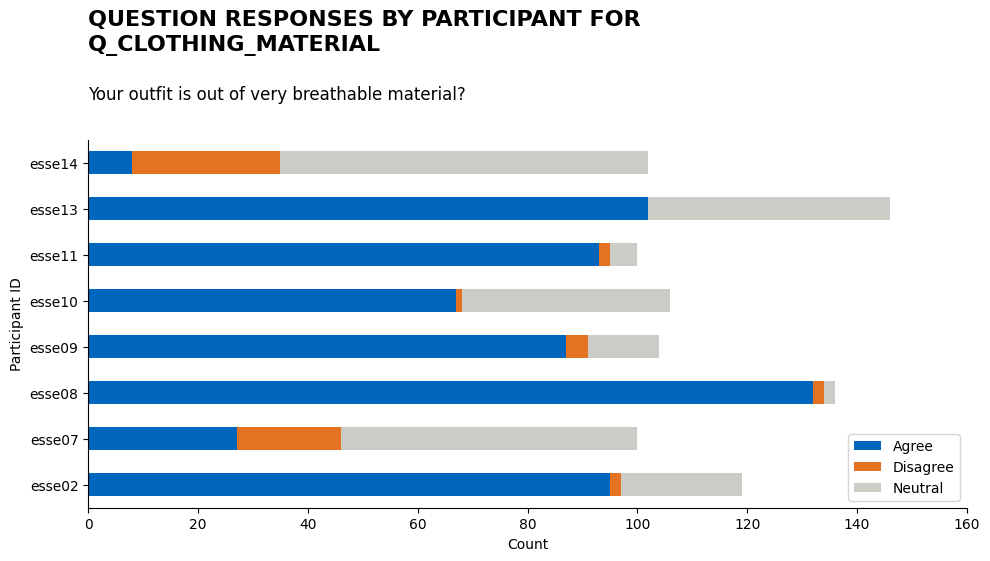

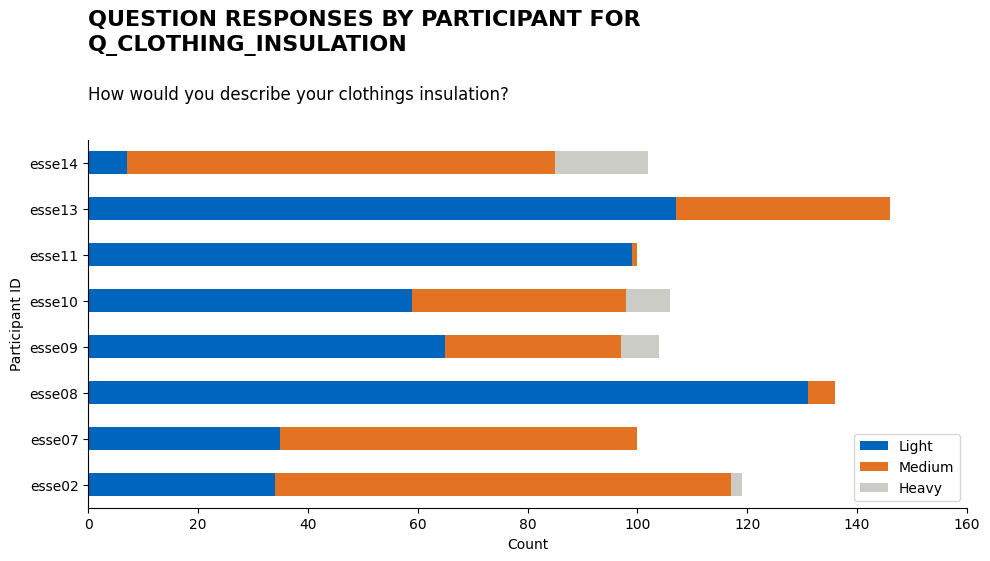

In [16]:
# -----------------------------------
max_value = 160
expected_responses = ['Agree', 'Disagree', 'Neutral']
colors = [_modules.TUMBlue, _modules.TUMAccentOrange, _modules.TUMLightGray] 
question_full = 'Your outfit is overall very dark in colors?'
question_id = 'q_clothing_color'

plot_stacked_bar_chart(response_counts, expected_responses, colors, question_full, question_id, max_value)

# -----------------------------------
max_value = 160
expected_responses = ['Agree', 'Disagree', 'Neutral']
colors = [_modules.TUMBlue, _modules.TUMAccentOrange, _modules.TUMLightGray] 
question_full = 'Your outfit is out of very breathable material?'
question_id = 'q_clothing_material'

plot_stacked_bar_chart(response_counts, expected_responses, colors, question_full, question_id, max_value)

# -----------------------------------
max_value = 160
expected_responses = ['Light', 'Medium', 'Heavy']
colors = [_modules.TUMBlue, _modules.TUMAccentOrange, _modules.TUMLightGray] 
question_full = 'How would you describe your clothings insulation?'
question_id = 'q_clothing_insulation'

plot_stacked_bar_chart(response_counts, expected_responses, colors, question_full, question_id, max_value)